## load in data from datapoints.txt and store in good structure

In [212]:
import matplotlib.pyplot as plt
import csv

# initializing to store data labeled as 0 and 1
label_0_data = []
label_1_data = []

# Downloading data from "datapoints.txt"
with open('datapoints.txt', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        width, height, label = map(float, row)
        if label == 0:
            label_0_data.append([width, height])
        elif label == 1:
            label_1_data.append([width, height])

print(label_0_data)
print(label_1_data)

[[21.959384499160468, 31.23956701424158], [17.714056417303343, 31.44170391314962], [19.332572350434354, 32.25325633655492], [20.191281253428173, 35.06966921830237], [19.639358214988224, 34.56117030001663], [18.341233265627693, 31.399261188293124], [20.23890182459327, 32.78945132868386], [17.905128921789093, 28.88813385482529], [19.299333494980544, 30.486337996080024], [20.118681851201636, 31.89116680793916], [17.96926166354966, 32.48406633310577], [21.58631807419169, 30.975094109600928], [18.659636883604406, 33.04492931889734], [19.209914415003638, 31.420355685575746], [18.16229126686346, 29.93643755301725], [19.120619567709372, 30.699542112256864], [18.583516818010633, 31.317010181098944], [20.282109030336354, 33.18796105898338], [17.672876665469843, 32.67247775608707], [20.795121649361587, 32.493051910886486], [20.101930916301317, 31.19190374413498], [20.39204407747099, 32.08774193592624], [20.098954730848863, 33.067467402673685], [20.88810038727894, 32.644004609994596], [18.59843317

## load in data from testpoints.txt and store in good structure

In [206]:
# Downloading data from "testpoints.txt"
with open("testpoints.txt", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        test_list = [
            (25, 32),
            (24.2, 31.5),
            (22, 34),
            (20.5, 34),
        ]




print(test_list)

[(25, 32), (24.2, 31.5), (22, 34), (20.5, 34)]


## plotting the points

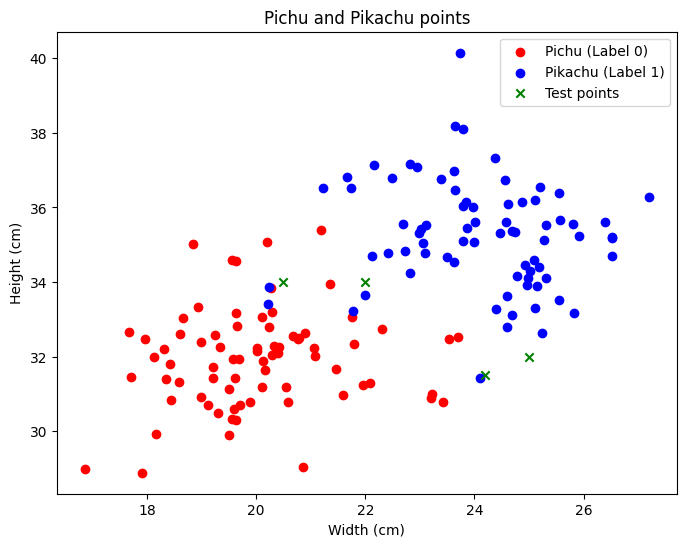

In [207]:
import matplotlib.pyplot as plt
import numpy as np

# Creating figure for plotting
plt.figure(figsize=(8, 6))

# Creating a scatter plot with colors based on "labels, "c" specifies every color based on "labels"
plt.scatter([x[0] for x in label_0_data], [x[1] for x in label_0_data], c="red", marker="o", label="Pichu (Label 0)")
plt.scatter([x[0] for x in label_1_data], [x[1] for x in label_1_data], c="blue", marker="o", label="Pikachu (Label 1)")
plt.scatter([x[0] for x in test_list], [x[1] for x in test_list], c="green", marker="x", label="Test points")

# Setting labels for x and y axes
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")

plt.legend()

# Title for plot
plt.title("Pichu and Pikachu points")

# Show plot
plt.show()






## Calculating distance between points

In [208]:
import numpy as np

# Defining a function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2-x1) ** 2 + (y2 - y1)**2)

# Converting tuples
label_0_data = [list(point) for point in label_0_data]
label_1_data = [list(point) for point in label_1_data]

# Creating a single list for all data
all_data = label_0_data + label_1_data + test_list
num_points = len(all_data) # Calculating number of points

# Creating array to store distances
Distances = np.zeros((num_points, num_points))

# calculating distance between all data points using loop in loop
for i in range(num_points):
    for j in range(num_points):
        Distances[i][j] = euclidean_distance(all_data[i], all_data[j])
        
# going through matrix to print distance between points
for i in range(num_points):
    for j in range(num_points):
        print(f"distance between point {i} and point {j}: {Distances[i][j]}")




distance between point 0 and point 0: 0.0
distance between point 0 and point 1: 4.250137627007489
distance between point 0 and point 2: 2.815618601101218
distance between point 0 and point 3: 4.218515376423372
distance between point 0 and point 4: 4.051613301799872
distance between point 0 and point 5: 3.6216737260472187
distance between point 0 and point 6: 2.315642895966499
distance between point 0 and point 7: 4.686814076731588
distance between point 0 and point 8: 2.7646383667017354
distance between point 0 and point 9: 1.9526311810860202
distance between point 0 and point 10: 4.179696017405606
distance between point 0 and point 11: 0.45730129534918973
distance between point 0 and point 12: 3.761338508754545
distance between point 0 and point 13: 2.7554074630362995
distance between point 0 and point 14: 4.014481710939353
distance between point 0 and point 15: 2.88967355090504
distance between point 0 and point 16: 3.376755846182081
distance between point 0 and point 17: 2.570893298

## deciding which pokemon based on closest point

In [209]:
import numpy as np

# Assuming label_0_data contains Pichu points and label_1_data contains Pikachu points

# Append the coordinate(s) you want to classify to the test_list
test_list += [(25, 32), (24.2, 31.5), (22, 34), (20.5, 34)]

# Calculate distances between all data points
for i in range(num_points):
    for j in range(num_points):
        Distances[i][j] = euclidean_distance(all_data[i], all_data[j])

# Create a list to store the closest label for each point
closest_labels = []

# Determine if Pichu or Pikachu is the closest for each point
for i in range(num_points):
    closest_label = None
    min_distance = float('inf')  # Initialize with a large value
    for j in range(num_points):
        if i != j:  # Exclude the point itself
            distance = Distances[i][j]
            if distance < min_distance:
                min_distance = distance
                if j < len(label_0_data):
                    closest_label = "Pichu"
                elif j < len(label_0_data) + len(label_1_data):
                    closest_label = "Pikachu"
    closest_labels.append(closest_label)

# Print the classification results for the test points
for i in range(len(label_0_data) + len(label_1_data), num_points):
    print(f"Sample with (width, height): {test_list[i - num_points]} classified as {closest_labels[i - num_points]}")

Sample with (width, height): (25, 32) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22, 34) classified as Pikachu
Sample with (width, height): (20.5, 34) classified as Pichu


## Uppgift 1

In [211]:
# Allow the user to input a test point and classify it
while True:
    try:
        width = float(input("Enter the test point width: "))
        height = float(input("Enter the height of the test point: "))
        test_point = (width, height)
        break
    except ValueError:
        print("Invalid input")

# Calculate the closest label for the user-input test point
min_distance = float('inf')
closest_label = None
for i in range(num_points):
    distance = euclidean_distance(test_point, all_data[i])
    if distance < min_distance:
        min_distance = distance
        if i < len(label_0_data):
            closest_label = "Pichu"
        elif i < len(label_0_data) + len(label_1_data):
            closest_label = "Pikachu"

print(f"Test point with (width, height): {test_point} is classified as {closest_label}")


Test point with (width, height): (77.0, 99.0) is classified as Pikachu


## Uppgift 2

In [204]:
import numpy as np
from operator import itemgetter 

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2-x1) ** 2 + (y2 - y1)**2)

test_points = [(25, 32), (24.2, 31.5), (22, 34), (20.5, 34)]

for test_point in test_points:
    distances = [(i, euclidean_distance(test_point, point)) for i, point in enumerate(all_data)]


closest_indices = [index for index, _ in sorted (distances, key=itemgetter(1))[:10]]

closest_points = [all_data[i] for i in closest_indices]

print(f"Test point (width, height): {test_point} - closest points:")
for i, point in enumerate(closest_points, start=1):
    print(f"{i}. {point}")


Test point (width, height): (20.5, 34) - closest points:
1. (20.5, 34)
2. (20.5, 34)
3. (20.5, 34)
4. (20.5, 34)
5. [20.276898330625336, 33.84658247356705]
6. [20.240420339246214, 33.87654102727224]
7. [20.216002852334192, 33.41610156154373]
8. [20.282109030336354, 33.18796105898338]
9. [21.35018601896744, 33.94708664610186]
10. [20.098954730848863, 33.067467402673685]


## Uppgift 3